# Introduction to Machine Learning - Supervised Learning - Final Project
## Coronary heart disease risk prediction using Logistic Regression


This analysis aims to predict the risk of having coronary heart disease in 10 years using different factors/variables. The data is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The data is publicly available in  https://www.kaggle.com/datasets/aasheesh200/framingham-heart-study-dataset . Below is what we know about the dataset:

* male: male or female
* age: age of the patient
* education: level of education
* currentSmoker: whether or not the patient is a current smoker
* cigsPerDay: the number of cigarettes that the person smoked on average in one day
* BPMeds: whether or not the patient was on blood pressure medication
* prevalentStroke: whether or not the patient had previously had a stroke
* prevalentHyp: whether or not the patient was hypertensive
* diabetes: whether or not the patient has diabetes
* totChol: total cholesterol level
* sysBP: systolic blood pressure
* diaBP: diastolic blood pressure
* BMI: Body Mass Index
* heartRate: Heart rate
* Glucose: glucose level
* TenYearCHD : 10 year risk of coronary heart disease CHD

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Exploratory Data Analysis

In [311]:
# Read Data
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### Histograms
By plotting the histogram of each features we can see the distribution for each values. We can also identify which are the categorical variables in the data.

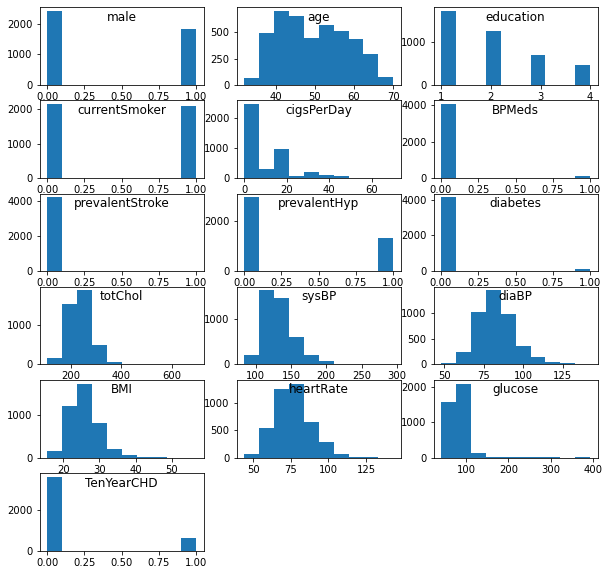

In [324]:
ncols = 3
nrows = int(np.ceil(len(df.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]

        if counter < len(df.columns):
            ax.hist(df[df.columns[counter]], label='{}'.format(df.columns[counter]))
            ax.set_title(df.columns[counter],x=0.5, y=0.75)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()

#### Correlation Matrix and Pairplot
By analyzing the pairplot, we can see features that are correlated with each other. Some of them are `male and cigsPerDay`, `age and sysBP`, `age and prevalentHyp`, `currentSmoker and cigsPerDay` (obviously), `prevalentHyp and sysBP`, `diabetes and glucose`, and `sysBP and diaBP`. 

<AxesSubplot:>

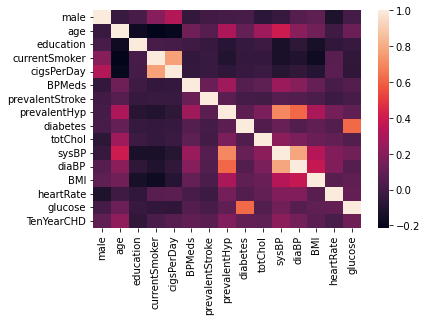

In [329]:
cor_matrix = pd.DataFrame(df.corr())
cor_matrix = cor_matrix.loc[:, cor_matrix.columns!='TenYearCHD']
#cor_matrix = cor_matrix.iloc[1:, :]
sb.heatmap(cor_matrix ,xticklabels=True, yticklabels=True)

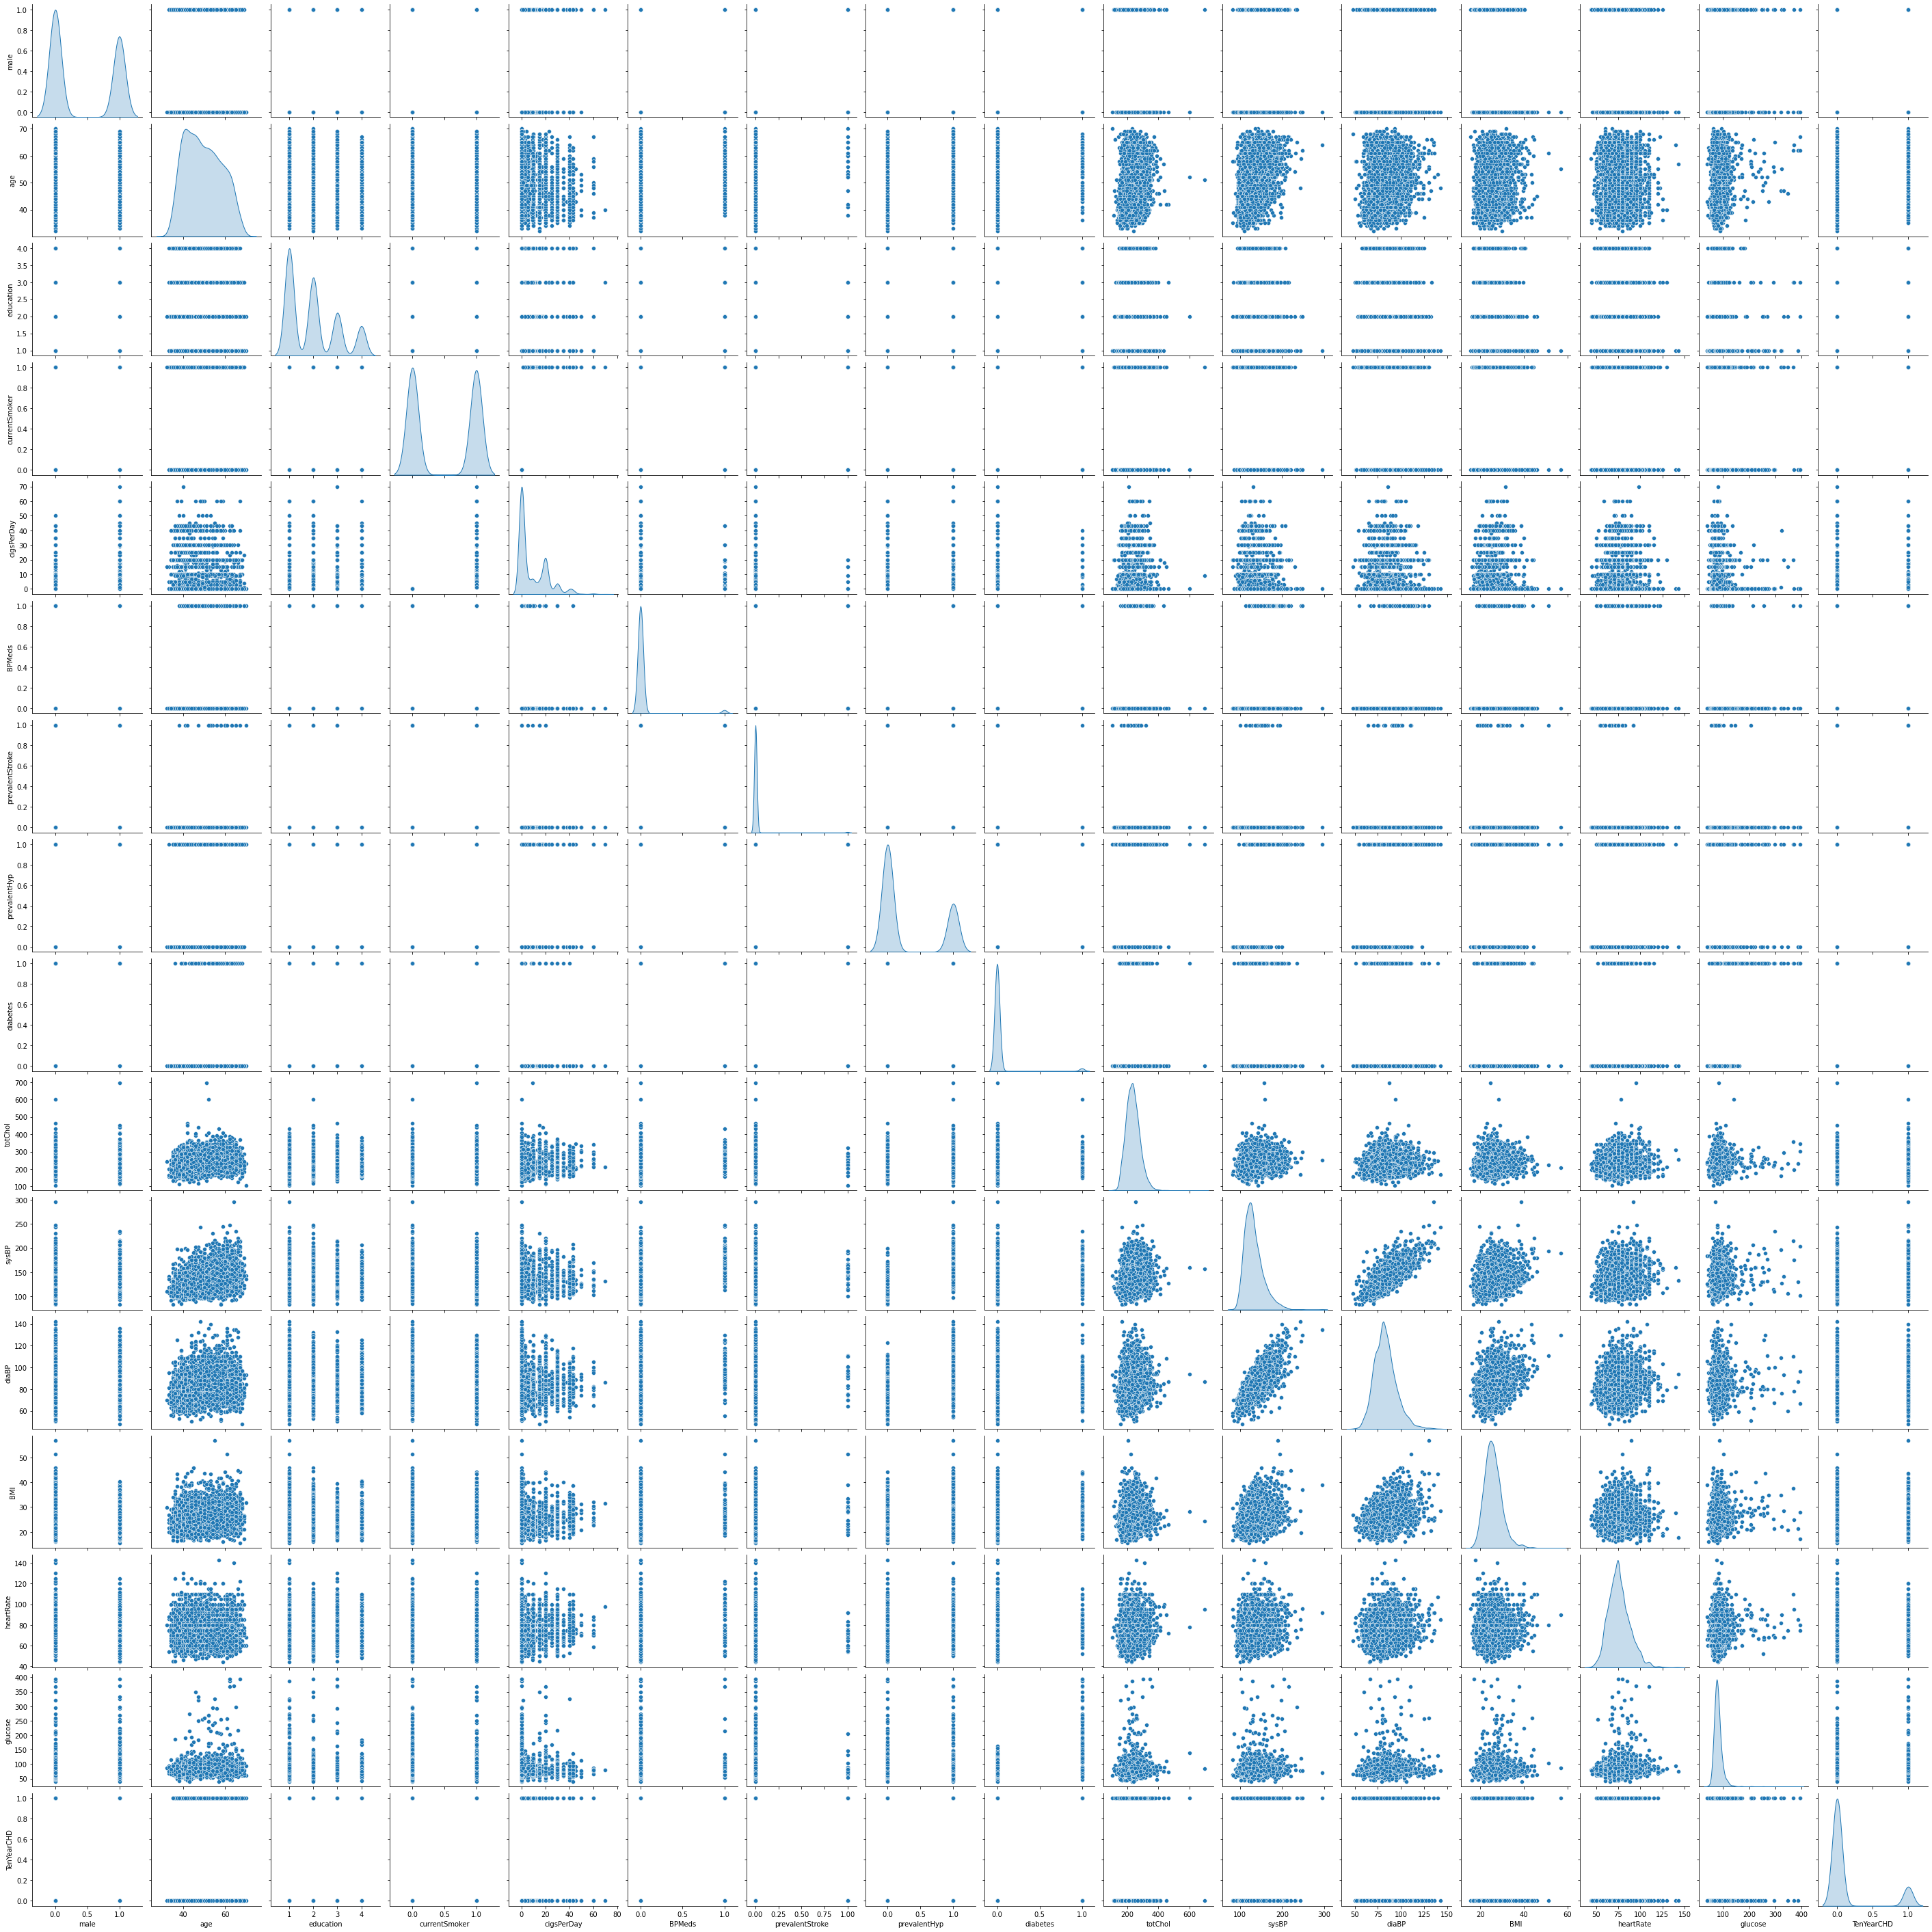

In [330]:
sb.pairplot(df, diag_kind = "kde")

#### Missing Values and Imputation

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [332]:
# Check for nulls
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

The dataset contains null values and so we need to either impute of remove the data with nulls. Let's look at the data with nulls:

In [333]:
col_null = df.columns[df.isna().any()].tolist()
print(col_null)

['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']


In [ ]:
# Impute missing values
df['education'] = df['education'].fillna(value = df['education'].median()).values
df['cigsPerDay'] = df['cigsPerDay'].fillna(value = df['cigsPerDay'].median()).values
df['BPMeds'] = df['BPMeds'].fillna(value = df['BPMeds'].median()).values
df['totChol'] = df['totChol'].fillna(value = df['totChol'].mean()).values
df['BMI'] = df['BMI'].fillna(value = df['BMI'].mean()).values
df['heartRate'] = df['heartRate'].fillna(value = df['heartRate'].mean()).values
df['glucose'] = df['glucose'].fillna(value = df['glucose'].median()).values

In [307]:
# Check for nulls
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### Model Training and Evaluation

The code below sets values for y labels and X features values and scales them using `StandardScaler()`. The data then is split into train and test datasets with 20% of the data for the test data set.

In [293]:
y = df['TenYearCHD'].values
X = df.drop('TenYearCHD', axis=1).values

# perform scaling on X data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# train_test split data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [294]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [298]:
pred = model.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print('Accuracy: '+str('{:.2%}'.format(accuracy)))

Accuracy: 84.67%


In [321]:
from sklearn.metrics import recall_score
recall = recall_score(pred, y_test, average='binary')
print('Recall: '+str('{:.2%}'.format(recall)))

Recall: 88.24%


In [322]:
confusion_matrix(pred, y_test)

array([[703, 128],
       [  2,  15]], dtype=int64)

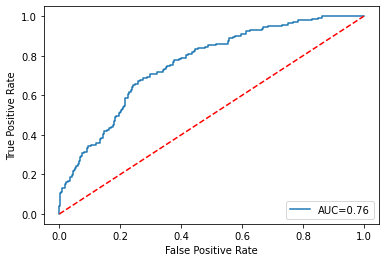

In [334]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#define metrics
y_pred_prob = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str('{:.2}'.format(auc)))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()
ax.axline((1, 1), slope=1)

### Conclusion
By performing Logistic Regression we go an accuracy score of 84.67% and a recall of 88.24% which is not very good but also not bad. We have good rate of true positives but we also see significant false positives. Consequences of having false positives is not bad at all just because the patient may tend to improve his/her own health. AUC score of 0.76 also is not too bad also. There can be ways to improve the models accuracy but those are in scope of this analysis.